In [1]:
#import necessary library
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")
from matplotlib.pyplot import figure


In [2]:
#import dataset
df_customer=pd.read_csv("customers.csv")

In [3]:
#randomly get 5 rows
df_customer.sample(5)

,customer_id,became_member_on,gender,age,income
9966,7d680b5335db412f82434247a682b727,20151202,NaN,118,NaN
10708,ab5c5c105a1f42bcbee68e2fb2feaffe,20161206,F,92,75000.0
2885,c34d166e5c634b3eb6fd40547d930c18,20150815,M,20,61000.0
8329,3da3248fc0c2453fbc0246e3df717cf2,20161123,M,21,62000.0
16048,b4d50689af024749a235c6ee77db75a6,20171106,NaN,118,NaN


In [4]:
#overall information about dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


1. Total Column 5, rows 17000
2. gender and income has null values
3. became_member_on column dtype is int, it should be date

In [5]:
# check sum of missing values in each column
customer_missing_values = df_customer.isnull().sum()
print(customer_missing_values)

customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64


In [6]:
# Check the percentage of missing data in columns
for col in df_customer.columns:
    pct_missing=np.mean(df_customer[col].isnull())
    print("{} - {}%".format(col, round(pct_missing,3)))

customer_id - 0.0%
became_member_on - 0.0%
gender - 0.128%
age - 0.0%
income - 0.128%


In [7]:
#check total number of duplicated rows
df_customer.duplicated().sum() 

np.int64(0)

In [8]:
for col in df_customer:
    duplicate_count = df_customer[col].duplicated().sum()
    print(f"Column '{col}' has {duplicate_count} duplicate(s).")

Column 'customer_id' has 0 duplicate(s).
Column 'became_member_on' has 15284 duplicate(s).
Column 'gender' has 16996 duplicate(s).
Column 'age' has 16915 duplicate(s).
Column 'income' has 16908 duplicate(s).


In [9]:
#general descriptive statistics for numerical variables
df_customer.describe()

,became_member_on,age,income
count,1.700000e+04,17000.000000,14825.000000
mean,2.016703e+07,62.531412,65404.991568
std,1.167750e+04,26.738580,21598.299410
min,2.013073e+07,18.000000,30000.000000
25%,2.016053e+07,45.000000,49000.000000
50%,2.017080e+07,58.000000,64000.000000
75%,2.017123e+07,73.000000,80000.000000
max,2.018073e+07,118.000000,120000.000000


1. Max age is 118, could be an outlier

In [10]:
#Summary of numeric and categorical columns
df_customer.describe(include='O')

,customer_id,gender
count,17000,14825
unique,17000,3
top,e4052622e5ba45a8b96b59aba68cf068,M
freq,1,8484


In [11]:
#how many times a value is present in a column?
df_customer.gender.value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

array([[<Axes: title={'center': 'became_member_on'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

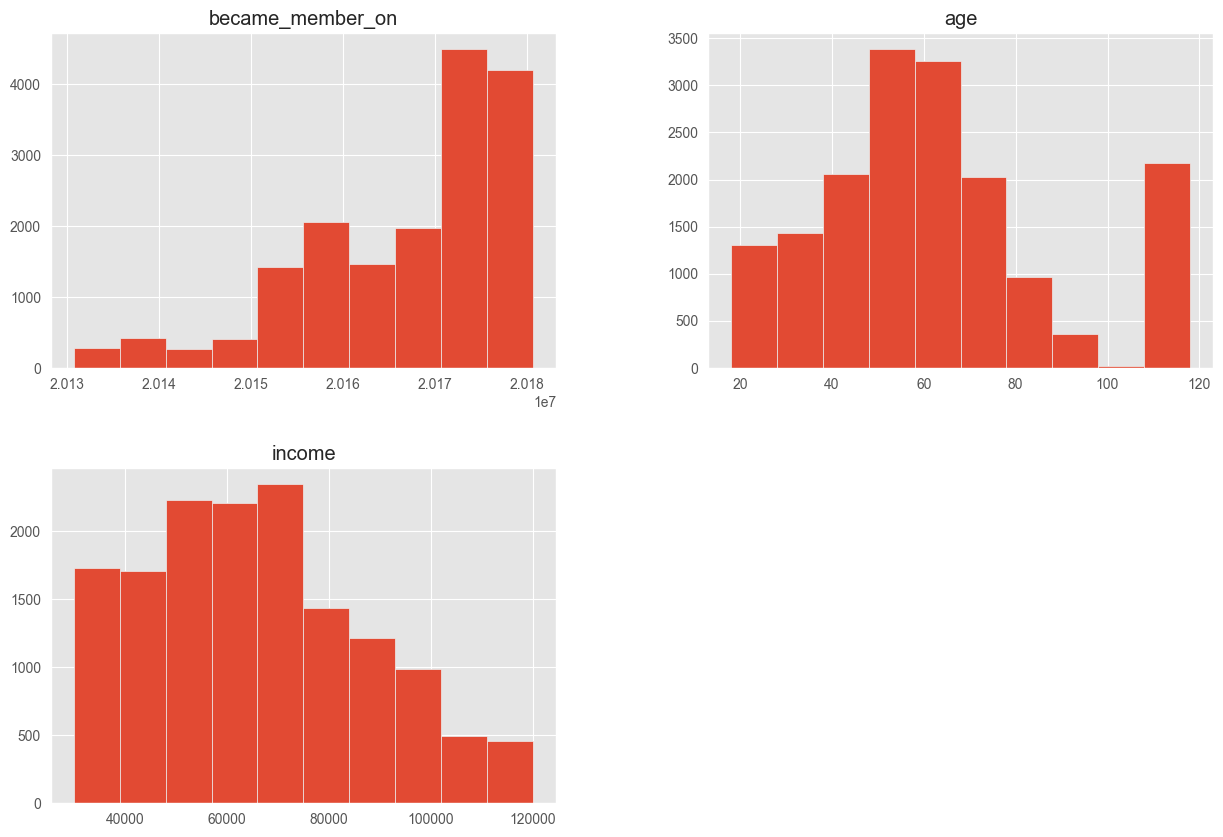

In [12]:
#Histograms for numeric:
df_customer.hist(figsize=(15, 10))

In [13]:
#data type summary
def column_type_summary(df):
    summary = {}
    for col in df.columns:
        # Convert each type to a string
        types = df[col].apply(lambda x: str(type(x))).value_counts()
        summary[col] = types
    return pd.DataFrame(summary).fillna(0).astype(int)



column_type_summary(df_customer)

,customer_id,became_member_on,gender,age,income
<class 'float'>,0,0,2175,0,17000
<class 'int'>,0,17000,0,17000,0
<class 'str'>,17000,0,14825,0,0


In [14]:
# Get IQR
Q1 = df_customer['income'].quantile(0.25)
Q3 = df_customer['income'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

#see the dataframe for outliers
df_customer[(df_customer['income']< lower_bound) | (df_customer['income']> upper_bound)]

Q1: 49000.0
Q3: 80000.0
IQR: 31000.0
Lower Bound: 2500.0
Upper Bound: 126500.0


,customer_id,became_member_on,gender,age,income


In [15]:
def get_negative_values(df):
    negative_data = {}
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        neg_rows = df[df[col] <= 0]
        if not neg_rows.empty:
            negative_data[col] = neg_rows

    return negative_data



In [16]:
get_negative_values(df_customer)

{}

In [17]:
df_customer.nunique()

customer_id         17000
became_member_on     1716
gender                  3
age                    85
income                 91
dtype: int64

In [66]:
def initial_report(df):
    print(" *** DATA CLEANING CHECKLIST ***\n" + "-"*40)

    print(f"*** Structure:\n- Total Rows: {df.shape[0]}\n- Total Columns: {df.shape[1]}")
    print(f"- Column Names: {list(df.columns)}\n")

    
    print("📌 Data Types:")
    for col, dtype in df.dtypes.items():
        print(f"  {col}: {dtype}")
    print()

    print("🧬 Mixed Data Types:")
    for col in df.columns:
        try:
            type_counts = df[col].apply(type).value_counts()
            if len(type_counts) > 1:
                print(f"  {col}:")
                for t, count in type_counts.items():
                    print(f"    - {t.__name__}: {count}")
        except Exception as e:
            print(f"  {col}: Error checking types - {e}")
    print()

    print("*** Distinct Values per Column:")
    for col in df.columns:
        print(f"  {col}: {df[col].nunique()}")
    print()

    print("*** Null Values and Percentages:")
    nulls = df.isnull().sum()
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        if nulls[col] > 0: # Only print if there are missing values
            print(f"  {col}: Missing Values: {nulls[col]}, Pct: {round(pct_missing * 100, 3)}%")
    print()

    
    print(f"\n*** Duplicates: {df.duplicated().sum()}")
    constant_cols = df.columns[df.nunique() == 1].tolist()
    if constant_cols:
        print(f"🧱 Constant Columns (no variance): {constant_cols}")
    print()

    print("*** Negative or Zero Values:")
    for col in df.select_dtypes(include='number').columns:
        count = (df[col] <= 0).sum()
        if count > 0:
            print(f"  {col}: {count}")
    print()


    print("*** Basic Statistics:")
    stat=df.describe()
    print(f"{stat}\n")

    print("*** Category Description:")
    stat=df.describe(include='O')
    print(f"{stat}\n")


    print("*** Outliers (IQR method):")
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"  {col}: {len(outliers)} outliers")
            print(f"    Lower Bound: {lower_bound:.2f}")  # Limiting to 2 decimal places for display
            print(f"    Upper Bound: {upper_bound:.2f}")  # Limiting to 2 decimal places for display
        else:
            print(f"  {col}: No outliers")
            print(f"    Lower Bound: {lower_bound:.2f}")
            print(f"    Upper Bound: {upper_bound:.2f}")
    print("-" * 40)


In [67]:
df_customer=pd.read_csv("customers.csv")

In [68]:
initial_report(df_customer)

 *** DATA CLEANING CHECKLIST ***
----------------------------------------
*** Structure:
- Total Rows: 17000
- Total Columns: 5
- Column Names: ['customer_id', 'became_member_on', 'gender', 'age', 'income']

📌 Data Types:
  customer_id: object
  became_member_on: int64
  gender: object
  age: int64
  income: float64

🧬 Mixed Data Types:
  gender:
    - str: 14825
    - float: 2175

*** Distinct Values per Column:
  customer_id: 17000
  became_member_on: 1716
  gender: 3
  age: 85
  income: 91

*** Null Values and Percentages:
  gender: Missing Values: 2175, Pct: 12.794%
  income: Missing Values: 2175, Pct: 12.794%


*** Duplicates: 0

*** Negative or Zero Values:

*** Basic Statistics:
       became_member_on           age         income
count      1.700000e+04  17000.000000   14825.000000
mean       2.016703e+07     62.531412   65404.991568
std        1.167750e+04     26.738580   21598.299410
min        2.013073e+07     18.000000   30000.000000
25%        2.016053e+07     45.000000   